## Load file to Google Colab

In [0]:
from google.colab import files

a = files.upload()

Saving BananaVIS.csv to BananaVIS.csv


## Preprocessing

In [0]:
import tensorflow as tf
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from numpy import diff
import random
%matplotlib inline
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [0]:
banana_data = pd.read_csv('BananaVIS.csv')

In [0]:
banana_data

,Wavelength(nm)\Sample name,22/1/2019n1t1,22/1/2019n1t2,22/1/2019n6t1,22/1/2019n6t2,22/1/2019n2t1,14/1/2019n4t1,14/1/2019n1t1,14/1/2019n1t2,14/1/2019n1t3,22/1/2019n1t2.1,22/1/2019n1t3,28/12/2018n1t1,28/12/2018n1t2,28/12/2018n1t3,22/1/2019n2t2,22/1/2019n2t3,22/1/2019n3t1,22/1/2019n3t2,22/1/2019n3t3,28/12/2019n4t2,28/12/2019n4t1,28/12/2019n4t3,28/12/2019n7t1,28/12/2019n7t2,28/12/2019n7t3,03/01/2019n1t1,03/01/2019n1t2,03/01/2019n1t3,06/01/2019n1t1,06/01/2019n1t2,06/01/2019n1t3,12/01/2019n1t1,12/01/2019n1t2,12/01/2019n1t3,22/12/2018n1t1,22/12/2018n1t2,22/12/2018n1t3,26/01/2019n1t1,26/01/2019n1t2,...,12/01/2019n1t2.2,12/01/2019n1t3.2,14/01/2019n1t1.1,14/01/2019n1t2.1,14/01/2019n1t3.1,22/01/2019n1t1,22/01/2019n1t2,22/01/2019n1t3,26/12/2018n1t1.1,26/12/2018n1t2.1,26/12/2018n1t3.1,06/01/2019n4t1,06/01/2019n4t2,06/01/2019n4t3,12/01/2019n4t1.2,12/01/2019n4t2.2,12/01/2019n4t3.2,14/01/2019n4t1.1,14/01/2019n4t2.2,14/01/2019n4t3.2,22/01/2019n4t1,22/01/2019n4t2,22/01/2019n4t3,26/12/2018n4t1.1,26/12/2018n4t2.1,26/12/2018n4t3.1,14/01/2019n6t1,14/01/2019n6t2,14/01/2019n6t3,06/01/2019n7t1,06/01/2019n7t2,06/01/2019n7t3,12/01/2019n7t1.1,12/01/2019n7t2.1,12/01/2019n7t3.1,22/01/2019n7t1,22/01/2019n7t2,22/01/2019n7t3,26/12/2018n7t2,26/12/2018n7t3
0,340,147,151,149,149,145,145,145,149,145,150,150,145,145,145,146,145,150,150,150,149,145,145,149,149,144,145,145,149,145,148,145,149,144,145,145,145,149,145,149,...,149,145,149,145,145,145,149,149,149,149,145,149,149,145,144,144,149,145,145,149,149,149,145,145,145,145,149,149,145,149,149,149,149,145,149,145,145,145,149,148
1,341.7708,146,145,145,145,146,145,145,145,145,145,145,145,145,146,146,146,145,147,146,145,146,145,145,145,145,146,146,145,145,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,146,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,146,146,145,145,145,145,145,145,145,145,145,145,145,145,145,146,145,146
2,343.5417,148,116,116,120,126,142,124,135,139,123,123,124,123,118,128,126,126,123,126,115,117,115,114,120,115,118,117,114,110,124,142,113,115,115,117,118,113,115,118,...,111,125,125,123,115,118,123,114,114,109,114,112,114,112,117,110,110,113,115,128,113,109,108,116,115,116,109,126,124,110,109,109,110,148,113,114,111,122,125,120
3,345.3125,144,113,113,116,123,136,120,132,136,120,120,121,118,115,124,122,124,118,123,112,115,112,110,116,114,115,115,111,108,120,136,109,111,112,114,114,108,110,115,...,108,122,122,116,111,115,117,110,111,105,110,109,108,108,114,106,108,110,112,124,109,105,104,115,110,114,105,123,121,108,106,106,108,144,109,112,108,118,122,115
4,347.0833,145,116,116,118,125,137,123,134,137,122,122,124,122,116,127,124,124,122,125,114,117,114,111,116,115,116,116,114,109,122,138,112,114,113,116,116,110,114,117,...,110,125,124,120,114,116,120,113,113,108,113,110,112,112,115,109,109,113,114,127,111,108,108,116,113,116,108,124,122,110,108,108,110,145,112,114,110,121,123,117
5,348.8542,137,112,113,115,122,133,118,128,133,117,117,120,116,115,123,121,122,116,123,111,113,110,108,115,112,112,114,110,105,117,134,108,110,110,113,114,108,110,114,...,106,120,118,116,109,114,116,109,110,103,109,108,108,108,112,105,106,109,110,124,108,105,103,113,109,113,104,120,117,105,104,104,106,137,108,109,106,117,122,114
6,350.625,144,116,116,120,125,138,124,133,135,123,123,124,122,118,128,124,126,123,124,115,117,115,113,118,116,116,118,114,109,123,137,112,114,114,115,118,112,114,117,...,110,124,123,120,114,117,122,114,114,109,113,110,113,112,115,110,110,113,114,126,112,110,109,116,114,116,110,124,123,110,109,109,111,145,113,115,110,120,124,120
7,352.3958,137,114,114,116,123,134,120,128,133,118,118,123,118,116,125,123,123,118,122,113,115,113,111,116,114,114,116,112,108,120,135,109,113,113,114,115,109,112,115,...,108,122,121,118,112,116,120,110,112,106,110,110,109,109,114,108,108,110,113,124,110,108,105,115,112,115,108,120,120,108,108,108,109,139,110,113,109,117,123,116
8,354.1667,135,113,113,115,120,133,120,126,129,116,116,120,117,114,123,122,122,117,122,110,113,110,109,115,113,113,

## Split data into train, validate and test sets


In [0]:

#for i in range(1,172):
#  if i not in [39, 38, 106, 77, 46, 66, 0, 1,137, 10, 136, 9, 14, 15, 18, 151, 4, 16, 17, 2, 3, 
#               168, 8, 133, 167, 6, 7, 134, 5, 33, 150, 132, 32, 31, 61, 122, 112, 113, 54, 130, 
#               53, 52, 119, 58, 118, 109, 126, 159, 59, 158, 145, 112, 123, 164, 94, 30, 29, 143,
#               51, 25, 26, 27, 81, 83, 90, 91, 72, 74, 141, 23, 87, 89, 98]:
spectrums= np.array(banana_data.values[:288,1:].T,dtype = np.int32)
categories=np.array(banana_data.values[288,1:],dtype=np.int32)
    

In [0]:
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train,y_test = train_test_split(spectrums[:90],categories[:90],test_size=0.2,random_state=42)
x_train, x_test, y_train,y_test = train_test_split(spectrums[:150],categories[:150],test_size=0.2,random_state=42)

In [0]:
x_check = spectrums[150:]
y_check = categories[150:]

## Data augmentation

In [0]:
# Load augmentation lib from Deep-Chemometrics
!git clone https://github.com/EBjerrum/Deep-Chemometrics.git

Cloning into 'Deep-Chemometrics'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.


In [0]:
%cd Deep-Chemometrics

/content/Deep-Chemometrics


In [0]:
!ls

ChemUtils.py  Deep_Chemometrics_EMSC_only.py.ipynb		 README.md
Dataset       Deep_Chemometrics_with_data_augmentation.py.ipynb


0.9999999999999999
1.8092523364261812e-17
5.052945537585946


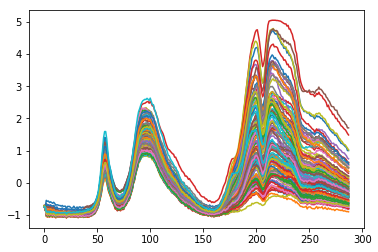

In [0]:
from ChemUtils import GlobalStandardScaler

xscaler = GlobalStandardScaler()

x_train = xscaler.fit_transform(x_train) 
x_test = xscaler.transform(x_test) 

print(x_train.std())
print(x_train.mean())
print(x_train.max())

_ = plt.plot(x_train.T)
plt.show()


In [0]:
x_check = xscaler.transform(x_check)

In [0]:
yscaler = GlobalStandardScaler()
y_train = yscaler.fit_transform(y_train)
y_test = yscaler.transform(y_test)

In [0]:
y_check = yscaler.transform(y_check)

In [0]:
# Test the yscaler function
yscaler.inverse_transform(y_check)

array([63., 55., 55., 55., 82., 82., 82., 65., 65., 65., 73., 73., 73.,
       67., 67., 67., 57., 57., 57., 84., 84.])

In [0]:
#EMSC rescaling
from ChemUtils import EmscScaler

emsc = EmscScaler()

emsc.fit(x_train)

X_train_emsc = emsc.transform((x_train))


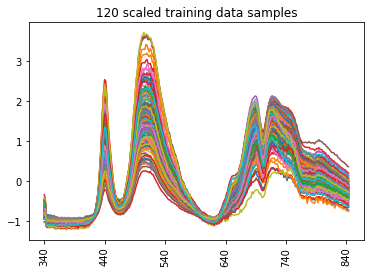

In [0]:
labels = list(banana_data.values[:288,0].T)
plt.plot(X_train_emsc.T)
plt.xticks(range(0,288,288//5), range(340,850,100), rotation='vertical')
plt.title('120 scaled training data samples')
plt.show()

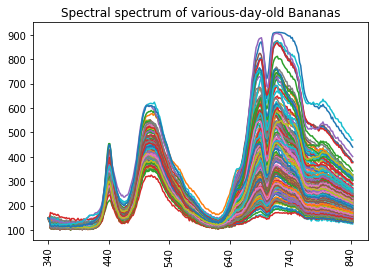

In [0]:
labels = list(banana_data.values[:288,0].T)
plt.plot(banana_data.values[:288,1:])
plt.xticks(range(0,288,288//5), range(340,850,100), rotation='vertical')
plt.title('Spectral spectrum of various-day-old Bananas')
plt.show()

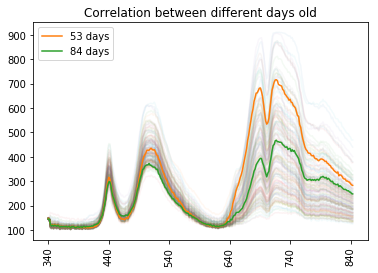

In [0]:
labels = list(banana_data.values[:288,0].T)
plt.plot(banana_data.values[:288,1:],alpha=0.05)
plt.plot(banana_data.values[:288,30],label='53 days')
plt.plot(banana_data.values[:288,135], label = '84 days')
plt.legend(loc='upper left')
plt.xticks(range(0,288,288//5), range(340,850,100), rotation='vertical')
plt.title('Correlation between different days old')
plt.show()

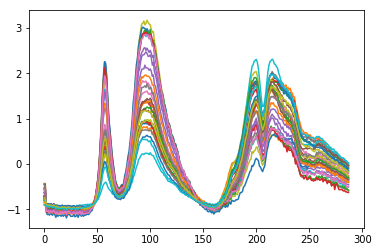

In [0]:
X_test_emsc = emsc.transform(x_test)

_ = plt.plot(X_test_emsc.T)

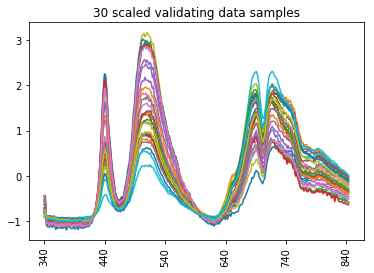

In [0]:
labels = list(banana_data.values[:288,0].T)
plt.plot(X_test_emsc.T)
plt.xticks(range(0,288,288//5), range(340,850,100), rotation='vertical')
plt.title('30 scaled validating data samples')
plt.show()

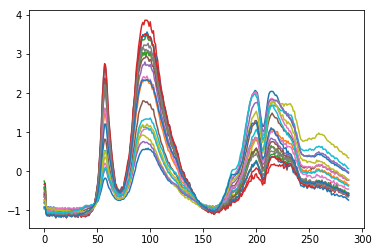

In [0]:
X_check_emsc = emsc.transform(x_check)

_ = plt.plot(X_check_emsc.T)

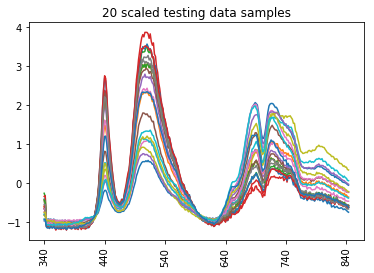

In [0]:
labels = list(banana_data.values[:288,0].T)
plt.plot(X_check_emsc.T)
plt.xticks(range(0,288,288//5), range(340,850,100), rotation='vertical')
plt.title('20 scaled testing data samples')
plt.show()

In [0]:
#Expand dataset, Function also available in ChemUtils
def dataaugment(x, betashift = 0.05, slopeshift = 0.05,multishift = 0.05):
    #Shift of baseline
    #calculate arrays
    beta = np.random.random(size=(x.shape[0],1))*2*betashift-betashift
    slope = np.random.random(size=(x.shape[0],1))*2*slopeshift-slopeshift + 1
    #Calculate relative position
    axis = np.array(range(x.shape[1]))/float(x.shape[1])
    #Calculate offset to be added
    offset = slope*(axis) + beta - axis - slope/2. + 0.5

    #Multiplicative
    multi = np.random.random(size=(x.shape[0],1))*2*multishift-multishift + 1

    x = multi*x + offset

    return x

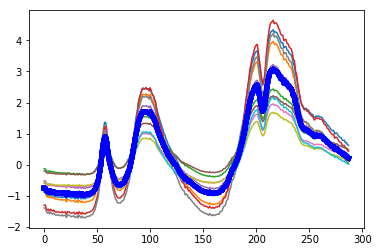

In [0]:
#Data Augment a single spectrum

#First Spectrum
X = x_test[0:1]
#Repeating the spectrum 10x
X = np.repeat(X, repeats=10, axis=0)
#Augment (Large pertubations for illustration)
X_aug = dataaugment(X,betashift = 0.5, slopeshift = 0.5,multishift = 0.5)
    
plt.plot(X_aug.T)
_= plt.plot(X.T, lw=5, c='b')

In [0]:
shift = np.std(x_train)*0.1
shift

0.09999999999999999

120000
120000


Text(0.5, 1.0, '120,000 scaled training data samples')

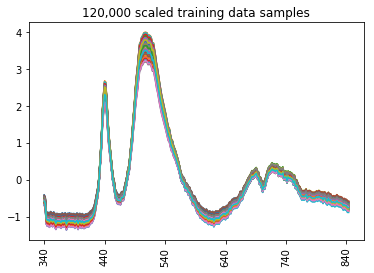

In [0]:
X_train_aug = np.repeat(X_train_emsc, repeats=1000, axis=0)
X_train_aug = dataaugment(X_train_aug, betashift = shift, slopeshift = 0.05, multishift = shift)

y_train_aug = np.repeat(y_train, repeats=1000, axis=0) #y_train is simply repeated


print(len(X_train_aug))
print(len(y_train_aug))
_ = plt.plot(X_train_aug[0:100].T)
plt.xticks(range(0,288,288//5), range(340,850,100), rotation='vertical')
plt.title('120,000 scaled training data samples')

In [0]:
shift = np.std(x_test)*0.1
shift

0.09853850228602279

150000
150000


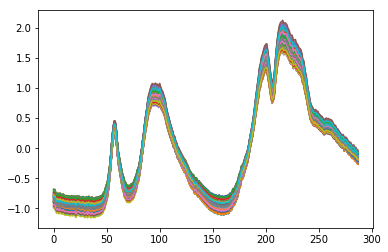

In [0]:
X_test_aug = np.repeat(X_test_emsc, repeats=5000, axis=0)
X_test_aug = dataaugment(X_test_aug, betashift = shift, slopeshift = 0.05, multishift = shift)

y_test_aug = np.repeat(y_test, repeats=5000, axis=0) #y_test is simply repeated


print(len(X_test_aug))
print(len(y_test_aug))
_ = plt.plot(X_test_aug[0:100].T)

# Neural Network

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Reshape, GaussianNoise, MaxPooling1D
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
#Hyperparameters for the network
DENSE = 128
DROPOUT = 0.5
C1_K  = 128 #Number of kernels/feature extractors for first layer
C1_S  = 64 #Width of the convolutional mini networks
C2_K  = 64
C2_S  = 32
activation='relu'

input_dim = x_train.shape[1]

#The model
def make_model():
    model = Sequential()
    #Adding a bit of GaussianNoise also works as regularization
    model.add(GaussianNoise(0.05, input_shape=(input_dim,)))
    #First two is number of filter + kernel size
    model.add(Reshape((input_dim, 1) ))
    model.add(Conv1D(C1_K, (C1_S), activation=activation, border_mode="same"))
    #model.add(MaxPooling1D())
    model.add(Conv1D(C2_K, (C2_S), border_mode="same", activation=activation))
    model.add(Flatten())
    model.add(Dropout(DROPOUT))
    model.add(Dense(DENSE, activation=activation))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(lr=0.005))

    return model

In [0]:
model = make_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_1 (GaussianNo (None, 288)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 288, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 288, 128)          8320      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 288, 64)           262208    
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_1 (Dropout)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 64, activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 32, activation="relu", padding="same")`


In [0]:


rdlr = ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-7, monitor='val_loss', verbose=1)

h = model.fit(X_train_aug, y_train_aug, epochs=50, batch_size=1024, validation_data=(X_test_aug, y_test_aug), callbacks=[rdlr])



Train on 600000 samples, validate on 150000 samples
Epoch 1/50
600000/600000 [==============================] - 74s 123us/step - loss: 0.8934 - val_loss: 0.6198
Epoch 2/50
600000/600000 [==============================] - 70s 117us/step - loss: 0.6082 - val_loss: 0.4690
Epoch 3/50
600000/600000 [==============================] - 71s 119us/step - loss: 0.4989 - val_loss: 0.4635
Epoch 4/50
600000/600000 [==============================] - 71s 119us/step - loss: 0.4519 - val_loss: 0.4380
Epoch 5/50
600000/600000 [==============================] - 71s 119us/step - loss: 0.4243 - val_loss: 0.4045
Epoch 6/50
600000/600000 [==============================] - 71s 119us/step - loss: 0.4053 - val_loss: 0.3793
Epoch 7/50
600000/600000 [==============================] - 71s 119us/step - loss: 0.3902 - val_loss: 0.4251
Epoch 8/50
600000/600000 [==============================] - 72s 119us/step - loss: 0.3774 - val_loss: 0.3714
Epoch 9/50
600000/600000 [==============================] - 72s 119us/step -

KeyboardInterrupt: ignored

In [0]:
np.squeeze(yscaler.inverse_transform(model.predict(X_check_emsc)))

array([62.59116 , 64.69198 , 60.44528 , 64.41306 , 77.273964, 64.65198 ,
       66.00365 , 69.32204 , 77.56587 , 69.183815, 76.247055, 66.500755,
       66.500755, 73.32584 , 52.690018, 65.21274 , 75.932686, 80.03909 ,
       75.80805 , 68.20998 , 84.47943 ], dtype=float32)

No handles with labels found to put in legend.


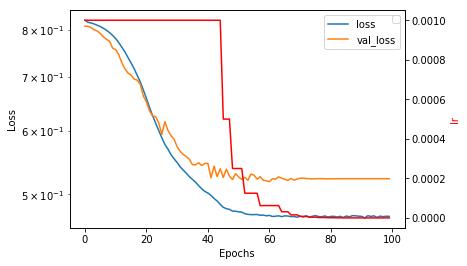

In [0]:
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
ax2 = plt.gca().twinx()
ax2.plot(h.history['lr'], color='r')
ax2.set_ylabel('lr',color='r')

plt.legend()

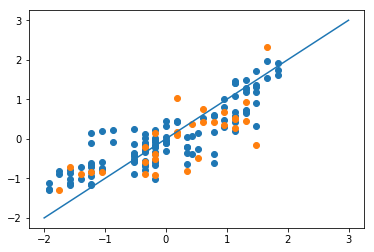

In [0]:
plt.scatter(y_train, model.predict(X_train_emsc))
plt.scatter(y_test, model.predict(X_test_emsc))
plt.plot([-2,3],[-2,3]) # Y = PredY line

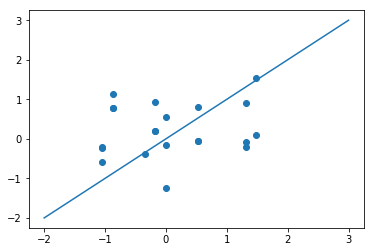

In [0]:
plt.scatter(y_check,model.predict(X_check_emsc))
plt.plot([-2,3],[-2,3]) # Y = PredY line

[63. 55. 55. 55. 82. 82. 82. 65. 65. 65. 73. 73. 73. 67. 67. 67. 57. 57.
 57. 84. 84.]
[62.59116  64.69198  60.44528  64.41306  77.273964 64.65198  66.00365
 69.32204  77.56587  69.183815 76.247055 66.500755 66.500755 73.32584
 52.690018 65.21274  75.932686 80.03909  75.80805  68.20998  84.47943 ]
9.515200660342261


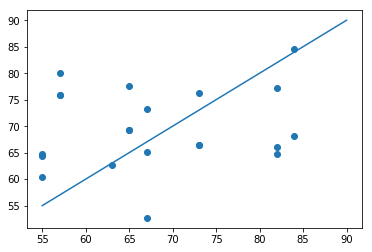

In [0]:
print(yscaler.inverse_transform(y_check))
print(np.squeeze(yscaler.inverse_transform(model.predict(X_check_emsc))))
print((1/len(y_check))*sum(abs(yscaler.inverse_transform(y_check)-np.squeeze(yscaler.inverse_transform(model.predict(X_check_emsc))))))
plt.scatter(yscaler.inverse_transform(y_check),np.squeeze(yscaler.inverse_transform(model.predict(X_check_emsc))))
plt.plot([55,90],[55,90]) # Y = PredY line

In [0]:
#Some metrics
def huber(y_true, y_pred, delta=1.0):
	y_true = y_true.reshape(-1,1)
	y_pred = y_pred.reshape(-1,1)
	return np.mean(delta**2*( (1+((y_true-y_pred)/delta)**2)**0.5 -1))

In [0]:
def benchmark(X_train,y_train,X_test, y_test, model):
    rmse = np.mean((y_train - model.predict(X_train).reshape(y_train.shape))**2)**0.5
    rmse_test = np.mean((y_test - model.predict(X_test).reshape(y_test.shape))**2)**0.5
    hub = huber(y_train, model.predict(X_train))
    hub_test = huber(y_test, model.predict(X_test))
    print ("RMSE  Train/Test\t%0.2F\t%0.2F"%(rmse, rmse_test))
    print ("Huber Train/Test\t%0.4F\t%0.4F"%(hub, hub_test))

In [0]:
benchmark(x_train, y_train, x_test, y_test, model)

RMSE  Train/Test	0.96	0.93
Huber Train/Test	0.3169	0.2852


## Partial Least Square 2D


In [0]:
from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=2)
pls2.fit(X_train_emsc, y_train)


PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [0]:
print(yscaler.inverse_transform(pls2.predict(X_check_emsc)).T)
print(np.mean(abs(yscaler.inverse_transform(pls2.predict(X_check_emsc)).T-yscaler.inverse_transform(y_check))))
print(np.std(abs(yscaler.inverse_transform(pls2.predict(X_check_emsc)).T-yscaler.inverse_transform(y_check))))
print(abs(yscaler.inverse_transform(pls2.predict(X_check_emsc)).T-yscaler.inverse_transform(y_check)))

[[70.42455373 66.20819838 64.08703111 64.09490905 68.27383393 67.1448291
  70.80879033 66.41959265 62.06669614 65.16690681 65.94716247 66.77196815
  66.77196815 66.16819261 69.40042747 67.49886228 69.48670422 67.99626288
  71.71755665 76.24411992 77.06637512]]
7.48747949152242
4.625998720535367
[[ 7.42455373 11.20819838  9.08703111  9.09490905 13.72616607 14.8551709
  11.19120967  1.41959265  2.93330386  0.16690681  7.05283753  6.22803185
   6.22803185  0.83180739  2.40042747  0.49886228 12.48670422 10.99626288
  14.71755665  7.75588008  6.93362488]]


## Boosting the Decision Tree

In [0]:

# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import AdaBoostRegressor

  
# create a regressor object 
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
#                          n_estimators=1000, random_state=0)

#regressor = DecisionTreeRegressor(max_depth=10)
  
# fit the regressor with X and Y data 
regressor.fit(X_train_emsc, y_train) 


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
print(yscaler.inverse_transform(regressor.predict(X_check_emsc)))
print(np.mean(abs(yscaler.inverse_transform(regressor.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(np.std(abs(yscaler.inverse_transform(regressor.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(abs(yscaler.inverse_transform(regressor.predict(X_check_emsc))-yscaler.inverse_transform(y_check)))

[73. 67. 84. 69. 84. 71. 67. 82. 71. 71. 53. 53. 53. 82. 49. 63. 80. 49.
 76. 53. 82.]
14.380952380952381
7.967052334615
[10. 12. 29. 14.  2. 11. 15. 17.  6.  6. 20. 20. 20. 15. 18.  4. 23.  8.
 19. 31.  2.]


## Random Forest

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, min_samples_split=2,min_samples_leaf=5)
# Train the model on training data
rf.fit(X_train_emsc, y_train);

In [0]:
print(yscaler.inverse_transform(rf.predict(X_check_emsc)))
print(np.mean(abs(yscaler.inverse_transform(rf.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(np.std(abs(yscaler.inverse_transform(rf.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(abs(yscaler.inverse_transform(rf.predict(X_check_emsc))-yscaler.inverse_transform(y_check)))

[67.83563491 63.65604087 75.87008462 74.07246026 76.89385477 63.29897954
 67.72146199 75.76907659 67.86834552 67.05336669 65.18539382 63.67124163
 63.67124163 77.65198589 63.22290613 65.95226044 72.42013574 63.34007557
 74.76444632 71.2804433  80.95039343]
9.735879823489716
5.95130168163301
[ 4.83563491  8.65604087 20.87008462 19.07246026  5.10614523 18.70102046
 14.27853801 10.76907659  2.86834552  2.05336669  7.81460618  9.32875837
  9.32875837 10.65198589  3.77709387  1.04773956 15.42013574  6.34007557
 17.76444632 12.7195567   3.04960657]


## Extra Trees

In [0]:
# Import the model we are using
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate model with 1000 decision trees
rf1 = ExtraTreesRegressor(n_estimators = 100, random_state = 42, min_samples_split=2,min_samples_leaf=5)
# Train the model on training data
rf1.fit(X_train_emsc, y_train);

In [0]:
print(yscaler.inverse_transform(rf1.predict(X_check_emsc)))
print(np.mean(abs(yscaler.inverse_transform(rf1.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(np.std(abs(yscaler.inverse_transform(rf1.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(abs(yscaler.inverse_transform(rf1.predict(X_check_emsc))-yscaler.inverse_transform(y_check)))

[70.13559127 62.47771032 70.46800397 74.98857937 73.68284127 64.90287302
 70.05385317 72.38646429 70.88340476 66.84944841 74.49255952 70.12664683
 70.12664683 77.42502778 64.3103254  75.86795635 68.20908333 70.82753968
 71.63380556 72.9318373  79.47871032]
8.906259070294782
5.181983813872611
[ 7.13559127  7.47771032 15.46800397 19.98857937  8.31715873 17.09712698
 11.94614683  7.38646429  5.88340476  1.84944841  1.49255952  2.87335317
  2.87335317 10.42502778  2.6896746   8.86795635 11.20908333 13.82753968
 14.63380556 11.0681627   4.52128968]


## Gradient Boosting

In [0]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate model with 1000 decision trees
rf2 = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.12,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
# Train the model on training data
rf2.fit(X_train_emsc, y_train);

In [0]:
print(yscaler.inverse_transform(rf2.predict(X_check_emsc)))
print(np.mean(abs(yscaler.inverse_transform(rf2.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
print(np.std(abs(yscaler.inverse_transform(rf2.predict(X_check_emsc))-yscaler.inverse_transform(y_check))))
rprint(abs(yscaler.inverse_transform(rf2.predict(X_check_emsc))-yscaler.inverse_transform(y_check)))

[68.93191448 63.68023428 73.12391811 74.9142895  80.74901289 63.33058358
 67.98258856 70.74106639 66.60601755 65.49199584 71.46676009 77.64312209
 77.64312209 79.53660656 55.91667481 72.10101425 70.86112997 68.53272035
 78.22556048 67.62592894 85.10121871]
9.431541989423046
6.713219515250784
[ 5.93191448  8.68023428 18.12391811 19.9142895   1.25098711 18.66941642
 14.01741144  5.74106639  1.60601755  0.49199584  1.53323991  4.64312209
  4.64312209 12.53660656 11.08332519  5.10101425 13.86112997 11.53272035
 21.22556048 16.37407106  1.10121871]


## Ensemble of Random Forest, XGB, LGB, Extra Trees and AdaBoost

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
# model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor


class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(n_splits=self.n_splits, shuffle=True, random_state=2016).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                y_holdout = y[test_idx]
                print ("Fit Model %d fold %d" % (i, j))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]                

                S_train[test_idx, i] = np.squeeze(y_pred)
                S_test_i[:, j] = np.squeeze(clf.predict(T)[:])
            S_test[:, i] = S_test_i.mean(axis=1)

        # results = cross_val_score(self.stacker, S_train, y, cv=5, scoring='r2')
        # print("Stacker score: %.4f (%.4f)" % (results.mean(), results.std()))
        # exit()

        self.stacker.fit(S_train, y)
        res = self.stacker.predict(S_test)[:]
        return res

# rf params
rf_params = {}
rf_params['n_estimators'] = 2000
rf_params['max_depth'] = 8
rf_params['min_samples_split'] = 100
rf_params['min_samples_leaf'] = 30

# xgb params
xgb_params = {}
xgb_params['n_estimators'] = 50
xgb_params['min_child_weight'] = 12
xgb_params['learning_rate'] = 0.12
xgb_params['max_depth'] = 6
xgb_params['subsample'] = 0.77
xgb_params['reg_lambda'] = 0.8
xgb_params['reg_alpha'] = 0.4
xgb_params['base_score'] = 0
#xgb_params['seed'] = 400
xgb_params['silent'] = 1


# lgb params
lgb_params = {}
lgb_params['n_estimators'] = 450
lgb_params['max_bin'] = 8
lgb_params['learning_rate'] = 0.037 # shrinkage_rate
lgb_params['metric'] = 'l1'          # or 'mae'
lgb_params['sub_feature'] = 0.35    
lgb_params['bagging_fraction'] = 0.85 # sub_row
lgb_params['bagging_freq'] = 40
lgb_params['num_leaves'] = 512        # num_leaf
lgb_params['min_data'] = 500         # min_data_in_leaf
lgb_params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
lgb_params['verbose'] = 0
lgb_params['feature_fraction_seed'] = 2
lgb_params['bagging_seed'] = 3


# XGB model
xgb_model = XGBRegressor(**xgb_params)

# lgb model
lgb_model = LGBMRegressor(**lgb_params)

# RF model
rf_model = RandomForestRegressor(**rf_params)

# ET model
et_model = ExtraTreesRegressor()

# SVR model
# SVM is too slow in more then 10000 set
#svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.05)

# DecsionTree model
dt_model = DecisionTreeRegressor()

# AdaBoost model
ada_model = AdaBoostRegressor()

pls_model = PLSRegression(n_components=2)

stack = Ensemble(n_splits=5,
        stacker=pls_model,
        base_models=(rf_model, xgb_model, lgb_model, et_model, ada_model))


In [0]:
a = yscaler.inverse_transform(stack.fit_predict(X_train_emsc,y_train,X_check_emsc).T)
print(a)
print(np.mean(abs(a-yscaler.inverse_transform(y_check))))
print(np.std(abs(a-yscaler.inverse_transform(y_check))))
print(abs(a-yscaler.inverse_transform(y_check)))

Fit Model 0 fold 0
Fit Model 0 fold 1
Fit Model 0 fold 2
Fit Model 0 fold 3
Fit Model 0 fold 4
Fit Model 1 fold 0
Fit Model 1 fold 1
Fit Model 1 fold 2
Fit Model 1 fold 3
Fit Model 1 fold 4
Fit Model 2 fold 0
Fit Model 2 fold 1
Fit Model 2 fold 2
Fit Model 2 fold 3
Fit Model 2 fold 4
Fit Model 3 fold 0
Fit Model 3 fold 1
Fit Model 3 fold 2
Fit Model 3 fold 3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fit Model 3 fold 4
Fit Model 4 fold 0
Fit Model 4 fold 1
Fit Model 4 fold 2
Fit Model 4 fold 3
Fit Model 4 fold 4
[[67.34453256 64.74597994 69.45255535 73.16690549 72.90698337 63.87191874
  67.89161908 71.87315623 69.43460769 67.58593247 72.37104452 71.58527387
  71.58527387 75.37397175 64.88337524 74.08740589 69.97235123 70.3889132
  70.61698012 67.80651833 77.11896096]]
8.85820590207778
5.608987313427536
[[ 4.34453256  9.74597994 14.45255535 18.16690549  9.09301663 18.12808126
  14.10838092  6.87315623  4.43460769  2.58593247  0.62895548  1.41472613
   1.41472613  8.37397175  2.11662476  7.08740589 12.97235123 13.3889132
  13.61698012 16.19348167  6.88103904]]
